# <center><font color=Purple>FRAUDE FISCALE</font></center>

<font><b>Synopsis :</b></font><br>
Le dataset étudié ici présente des descriptions de contribuables et une valeur en `float` de la target.<br>
La description d'une variable `CTR_OBLFOP` "Obligations Foprolos" indique qu'il s'agit d'un jeu de données sur les contribuables tunisiens puisqu'il s'agit du Fonds de Promotion de Logements Sociaux qui est un système tunisien.
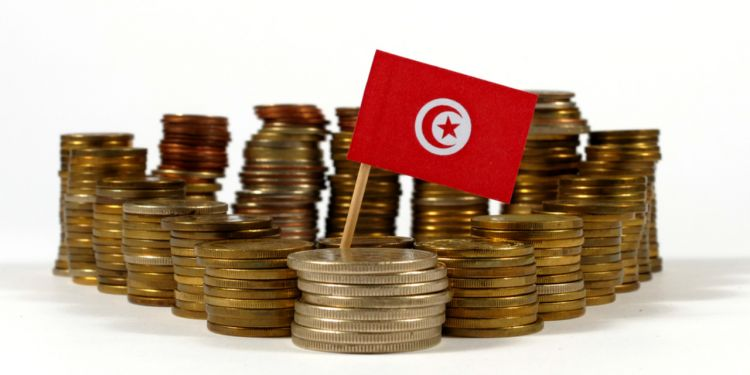

### Problématique métier
Dans un contexte de fraude aux impôts, les objectifs peuvent être :
- 1) Détécter qui est fraudeur et qui ne l'est pas
- 2) Tenter de déterminer si on peut prédire le taux de fraude suivant certaines caractéristiques à déterminer au cours de l'étude
- 3) Segmentation des profils de fraudeurs (Exemple Fraudeur de bonne fois)

### Traduction en problmatique Machine Learning
- 1) Classification
- 2) Régressions selon scenarii
- 3) Clustering

### Objectif :
L'ensemble des analyses de ces études nous permettront enfin d'émettres des hypothèses dans le but de proposer des actions concrètes pour réduire la fraude à l'impôt tunisien

**N.B** : Tous ces objectifs, ne seront pas réalisables dans cette étude pour des raison de délais (5 jours).
Nous commencerons par la classification et dans l'hypothèse peu probable que nous ayons terminé nous poursuivrons sur les autres démarches évoquées

Sommaire : 
- [1 : Importer les données](#1)
- [2 : Comprendre les données](#2)
- - [2-1 : Analyse de la forme](#2-1)
- - - [2-1-1 : La target](#2-1-1)
- - - [2-1-2 : Nombre de lignes et de colonnes](#2-1-2)
- - - [2-1-3 : Types de variables](#2-1-3)
- - - [2-1-4 : Valeurs manquantes](#2-1-4)
- - [2-2 : Analyse du fond](#2-2)
- - - [2-2-1 : Visualisation de la target](#2-2-1)
- - - [2-2-2 : Compréhension des variables](#2-2-2)
- - - - [2-2-2-1 : Création de groupes de features](#recueil)
- - - [2-2-3 : Corrélations features - target](#2-2-3)
- - - [2-2-4 : Valeurs aberrantes](#2-2-4)
- - - [2-2-5 : Valeurs atypiques](#2-2-5)
- [3 : Visualiser les données](#3)
- [4 : Nettoyer les données](#4)
- [5 : Equilibrer les données](#5)
- [6 : Identifier la problématique (classification)](#6)
- [7 : Appliquer des modèles](#7)
- [8 : Trouver le modèle plus pertinent](#8)
- - [8-1 : Train_test_split](#8-1)
- - [8-2 : Validation Set](#8-2)
- - [8-3 : Cross Validation](#8-3)
- - [8-4 : Validation Curve](#8-4)
- - [8-5 : GridSearchCV](#8-5)
- - [8-6 : Learning Curve](#8-6)
- [9 : Analyser le résultat](#9)


# Rapport
- **Variable target** : `target`
- **Lignes et colonnes** : 25 053 x 121<br>
### Analyse de forme
- **Types de variables** : 
  - float64(103), 
  - int64(16), 
  - object(2 `id` & `CTR_CATEGO_X`)
- **Analyse des valeurs manquantes** : 
  - **75%** des features avec moins de **1%** de NaN
  - le reste des features est à plus de **70%** de NaNs
  - **Mais** même à 94% de NaNs, cela représente quand même presque <font color="red"><b>1500</b> valeurs.</font>   
    - D'ailleurs certaines de ces valeurs vont se révéler importantes pour l'entrainement des algorithmes
- La target présente **2 parties** distinctes.
 - Une partie de valeurs à **0** qui représente un tiers des valeurs.
 - Une partie des valeurs répartis selon une distribution normale.
   - **Centrée** sur une valeur de **15**
   - **Amplitude** d'environ **+/-5**


### Analyse de fond
- **Visualisation de la target :**
- **Signification de la variable target :** Par déductions et intuition on peut dégager une hypothèse.
  - Les **0** représentent les personnes morales qui ne doivent rien au FISC -> **Groupe 0 = Non-fraudeurs**
  - Les **"fraudeurs"** sont désignés par la target selon un pourcentage ou une valeur ou encore un score qui désignerait la quantité de valeurs qu'ils auraient dû payer aux impôts. Ma thèse la plus crédible serait un pourcentage. (Entre **5 et 25% d'impayé**). -> **Groupe 1 = Fraudeurs**

Remarquons que si on retient cette hypothèse, on suggère qu'il y a **3 fois plus de fraudeurs** que de non fraudeurs ce qui est déstabilisant. <br>
Répartition de la target : (selon hypothèse)
- 75% Fraudeurs 
- 25% Non fraudeurs

Une étude métier pourrait éclaircir ce point.<br><br>
*Peut-être qu'il est très difficile de comprendre le système fiscal et que les fraudeurs sont constitués de fraudeurs de bonne foi et d'autres font exprès de frauder.* <br>
*Retenons cette idée pour une éventuelle extension de l'étude sur les fraudeurs* <br>
<center><b>hypothèse de la constitution des fraudeurs :</b></center>
<center>- <b>fraudeurs de bonne foi</b></center>
<center>- <b>fraudeurs intentionnels</b></center> 

- **Signification des variables :**
- **Relation variables / target :**


## Variables importantes et peu représentées:
- SND_MNTPRD_E :  	Montant Produit Exporté
- FAC_MFODEC_F : 	Montant taxe FODEC sur factures émises en susp.

## <a id='1'><center><font color="INDIANRED">1) Importer les données</font></center></a>

In [1]:
import pandas as pd
import python_personal_library as ppl

In [1073]:
list_dir = ppl.get_datasets("Datasets")

In [1074]:
list_dir

['.~lock.VariableDescription.csv#',
 'test.csv',
 'train.csv',
 'VariableDescription.csv']

In [3]:
df_train_initial = pd.read_csv("./Datasets/train.csv")
df_VariableDescription_initial = pd.read_csv("./Datasets/VariableDescription.csv")

In [4]:
from python_personal_library import exhaustiveDescribe
exhaustiveDescribe(df_train_initial)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25053 entries, 0 to 25052
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 23.1+ MB


Shape 
 
 
 
 
 Lines 
 25053 
 
 
 Columns 
 121 
 
 
 
 
 
 
 BCT_CODBUR 
 CTR_MATFIS 
 CTR_CATEGO_X 
 FJU_CODFJU 
 CTR_CESSAT 
 ACT_CODACT 
 CTR_OBLDIR 
 CTR_OBLACP 
 CTR_OBLRES 
 CTR_OBLFOP 
 CTR_OBLTFP 
 CTR_OBLDCO 
 CTR_OBLTVA 
 CTR_OFODEC 
 CTR_OFODEP 
 CTR_OFODET 
 CTR_OBLAUT 
 CTR_OBLASS 
 CTR_ODTIMB 
 CTR_OBLTCL 
 CTR_OBLTHO 
 CTR_OBLDLI 
 CTR_OBLTVI 
 CTR_RATISS 
 EXE_EXERCI 
 TVA_CHAFF6 
 TVA_CHAFF7 
 TVA_CHAF10 
 TVA_CHAF12 
 TVA_CAF125 
 TVA_CHAF15 
 TVA_CHAF18 
 TVA_CHAF22 
 TVA_CHAF29 
 TVA_CHAF36 
 TVA_TOTDUE 
 TVA_MOIDEB 
 TVA_CRDINI 
 TVA_BASIMB 
 TVA_DEDIMB 
 TVA_BASEQL 
 TVA_DEDEQL 
 TVA_BASEQI 
 TVA_DEDEQI 
 TVA_BASAUL 
 TVA_DEDAUL 
 TVA_BASAUI 
 TVA_DEDAUI 
 TVA_BASRSM 
 TVA_DEDRSM 
 TVA_RSNRES 
 TVA_TRSPOR 
 TVA_DEDREG 
 TVA_RESTIT 
 TVA_MNTPAY 
 TVA_MOIFIN 
 TVA_CRDFIN 
 TVA_ACHSUS 
 TVA_ACHEXO 
 TVA_ACHNDD 
 TVA_CAFEXP 
 TVA_CAFSUS 
 TVA_CAFEXO 
 TVA_AACHAB 
 TVA_CRDBLQ 
 TVA_CRDRES 
 TVA_CRDRMP 
 TVA_CRDREP 
 TVA_CRDRMC 
 TVA_MACHN 
 TVA_MCESQ 
 TVA_MTVLSM 
 TVA_TXVLSM 
 TVA_MTALSM 
 TVA_TXALSM 
 TVA_MTORDTVA 
 TVA_MTDJRTVA 
 TVA_MTORDTAX 
 TVA_MTDJRTAX 
 TVA_MTRESTAX 
 TVA_CA072018 
 TVA_CA132018 
 TVA_CA192018 
 ADB_MNTORD 
 SND_MNTPRD_I 
 SND_MNTTVA_I 
 SND_MNTDRC_I 
 SND_MNTAVA_I 
 SND_MNTTAX_I 
 SND_MNTPAY_I 
 SND_MNTAIR_I 
 SND_MNTPRD_E 
 SND_MNTTVA_E 
 SND_MNTDRC_E 
 SND_MNTAVA_E 
 SND_MNTTAX_E 
 SND_MNTPAY_E 
 SND_MNTAIR_E 
 SND_MNTPRD_A 
 SND_MNTTVA_A 
 SND_MNTDRC_A 
 SND_MNTAVA_A 
 SND_MNTTAX_A 
 SND_MNTPAY_A 
 SND_MNTAIR_A 
 AX1_BRTIMP 
 AX2_HONORA 
 AX2_LOYERS 
 AX3_REVCAP 
 AX5_MNTMAR 
 RES_ANNIMP 
 target 
 FAC_MNTPRI_F 
 FAC_MFODEC_F 
 FAC_MNTDCO_F 
 FAC_MNTTVA_F 
 FAC_MNTPRI_C 
 FAC_MFODEC_C 
 FAC_MNTDCO_C 
 FAC_MNTTVA_C 
 id 
 
 
 
 
 0 
 49 
 14185 
 P 
 99 
 1 
 6101 
 4 
 2 
 2 
 2 
 2 
 1 
 2 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 3 
 1.0 
 1.0 
 1.0 
 0 
 2013 
 0.0 
 0.0 
 0.0 
 52600000.0 
 0.0 
 0.0 
 612500.0 
 0.0 
 0.0 
 0.0 
 6422250.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 123608.0 
 9896.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 6412354.0 
 12.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.0 
 58912000.0 
 0.0 
 2530630.0 
 0.0 
 2013 
 13.575957 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 train_id0 
 
 
 1 
 221 
 6032 
 P 
 99 
 0 
 6271 
 8 
 2 
 1 
 1 
 1 
 1 
 2 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 3 
 1.0 
 1.0 
 1.0 
 0 
 2013 
 12000000.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 720000.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 720000.0 
 12.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.0 
 3425295.0 
 0.0 
 10924985.0 
 0.0 
 2013 
 11.692894 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 train_id1 
 
 
 2 
 181 
 8907 
 P 
 99 
 0 
 6102 
 4 
 2 
 2 
 2 
 2 
 1 
 2 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 3 
 1.0 
 1.0 
 1.0 
 0 
 2015 
 0.0 
 0.0 
 0.0 
 31926026.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 3831117.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 18861497.0 
 2209299.0 
 0.0 
 0.0 
 3566839.0 
 1783419.0 
 0.0 
 0.0 
 0.0 
 0.0 
 31150.0 
 12.0 
 192751.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 34442746.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2015 
 0.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN

10 colonnes sont dors et déjà identifiables comme inutiles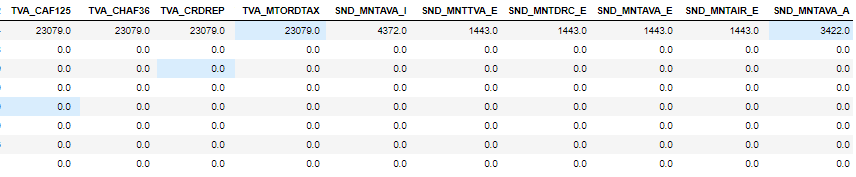

## <a id='2'><center><font color="INDIANRED">2) Comprendre les données</font></center></a>

- **Variable target** : `target`
- **Lignes et colonnes** : 25 053 x 121<br>
### Analyse de forme
- **Types de variables** : 
  - float64(103), 
  - int64(16), 
  - object(2 `id` & `CTR_CATEGO_X`)
- **Analyse des valeurs manquantes** : 
  - **75%** des features avec moins de **1%** de NaN
  - le reste des features est à plus de **70%** de NaNs
  - **Mais** même à 94% de NaNs, cela représente quand même presque <font color="red"><b>1500</b> valeurs.</font>
- La target présente **2 parties** distinctes.
 - Une partie de valeurs à **0** qui représente un tiers des valeurs.
 - Une partie des valeurs répartis selon une distribution normale.
   - **Centrée** sur une valeur de **15**
   - **Amplitude** d'environ **+/-5**


### Analyse de fond
- **Visualisation de la target :**
- **Signification de la variable target :** Par déductions et intuition on peut dégager une hypothèse.
  - Les **0** représentent les personnes morales qui ne doivent rien au FISC -> **Groupe 0 = Non-fraudeurs**
  - Les **"fraudeurs"** sont désignés par la target selon un pourcentage ou une valeur ou encore un score qui désignerait la quantité de valeurs qu'ils auraient dû payer aux impôts. Ma thèse la plus crédible serait un pourcentage. (Entre **5 et 25% d'impayé**). -> **Groupe 1 = Fraudeurs**

Remarquons que si on retient cette hypothèse, on suggère qu'il y a **3 fois plus de fraudeurs** que de non fraudeurs ce qui est déstabilisant. <br>
Répartition de la target : (selon hypothèse)
- 75% Fraudeurs 
- 25% Non fraudeurs

Une étude métier pourrait éclaircir ce point.<br><br>
*Peut-être qu'il est très difficile de comprendre le système fiscal et que les fraudeurs sont constitués de fraudeurs de bonne foi et d'autres font exprès de frauder.* <br>
*Retenons cette idée pour une éventuelle extension de l'étude sur les fraudeurs* <br>
<center><b>hypothèse de la constitution des fraudeurs :</b></center>
<center>- <b>fraudeurs de bonne foi</b></center>
<center>- <b>fraudeurs intentionnels</b></center> 

- **Signification des variables :**
- **Relation variables / target :**


### <a id='2-1'><center><font color="steelblue">2-1) Analyse de la forme</font></center></a>

La target présente **2 parties** distinctes.
- Une partie de valeurs à **0** qui représente un tiers des valeurs.
- Une partie des valeurs répartis selon une distribution normale.
- - **Centrée** sur une valeur de **15**
- - **Amplitude** d'environ **+/-5**

**Signification de la variable :**
Par déductions et intuition on peut dégager une hypothèse.
- Les **0** représentent les personnes morales qui ne doivent rien au FISC -> **Groupe 0 = Non-fraudeurs**
- Les **"fraudeurs"** sont désignés par la target selon un pourcentage ou une valeur ou encore un score qui désignerait la quantité de valeurs qu'ils auraient dû payer aux impôts. Ma thèse la plus crédible serait un pourcentage. (Entre **5 et 25% d'impayé**). -> **Groupe 1 = Fraudeurs**

Remarquons que si on retient cette hypothèse, on suggère qu'il y a **3 fois plus de fraudeurs** que de non fraudeurs ce qui est déstabilisant. <br>
Répartition de la target : (selon hypothèse)
- 75% Fraudeurs 
- 25% Non fraudeurs

Une étude métier pourrait éclaircir ce point.<br><br>
*Peut-être qu'il est très difficile de comprendre le système fiscal et que les fraudeurs sont constitués de fraudeurs de bonne foi et d'autres font exprès de frauder.* <br>
*Retenons cette idée pour une éventuelle extension de l'étude sur les fraudeurs* <br>
<center><b>hypothèse de la constitution des fraudeurs :</b></center>
<center>- <b>fraudeurs de bonne foi</b></center>
<center>- <b>fraudeurs intentionnels</b></center>

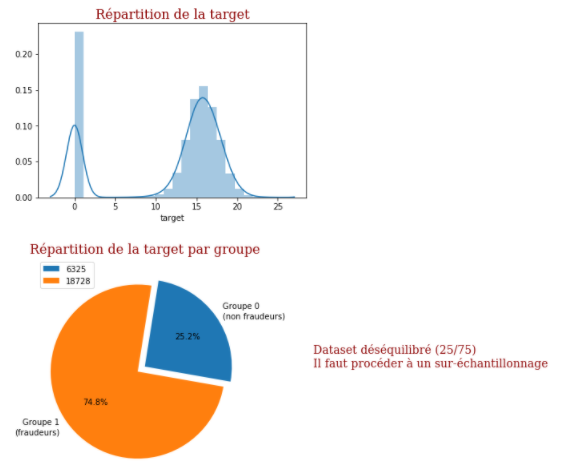

#### <a id='2-1-1'><center><font color="green">2-1-1) La target</font></center></a>

Compte tenu de cette hipothèse, et dans l'objectif de pouvoir faire une classification :
- je vais ajouter une colonne `GROUP` qui indiquera :
  - 0 pour les non-fraudeurs (`target==0`) 
  - 1 pour les fraudeurs (`target!=0`)

Ce sera plus simple pour l'analyse.
Peut-être que je la supprimerai avant la partie modeling.

## Dataframe categorie 0 et 1

Je constitue deux DF regroupant la catégorie que je nomme 0 où les valeurs de target sont à 0 et la catégorie que je nomme 1 pour les autres valeurs.
- catégorie 0 : target = 0 taille : 6325 lignes
- catégorie 1 : target différent de 0 : 18728 lignes

#### <a id='2-1-2'><center><font color="green">2-1-2) Nombre de lignes et de colonnes</font></center></a>

Lignes et colonnes : 25 053 x 121

#### <a id='2-1-3'><center><font color="green">2-1-3) Types de variables</font></center></a>

- **Types de variables** : 
  - float64(103), 
  - int64(16), 
  - object(2 `id` & `CTR_CATEGO_X`)

#### <a id='2-1-4'><center><font color="green">2-1-4) Valeurs manquantes</font></center></a>

Un dataset avec beaucoup de valeurs manquantes pour certaines colonnes (fin du tableau)
- En noir les valeurs présentes
- En Clair les valeurs manquantes
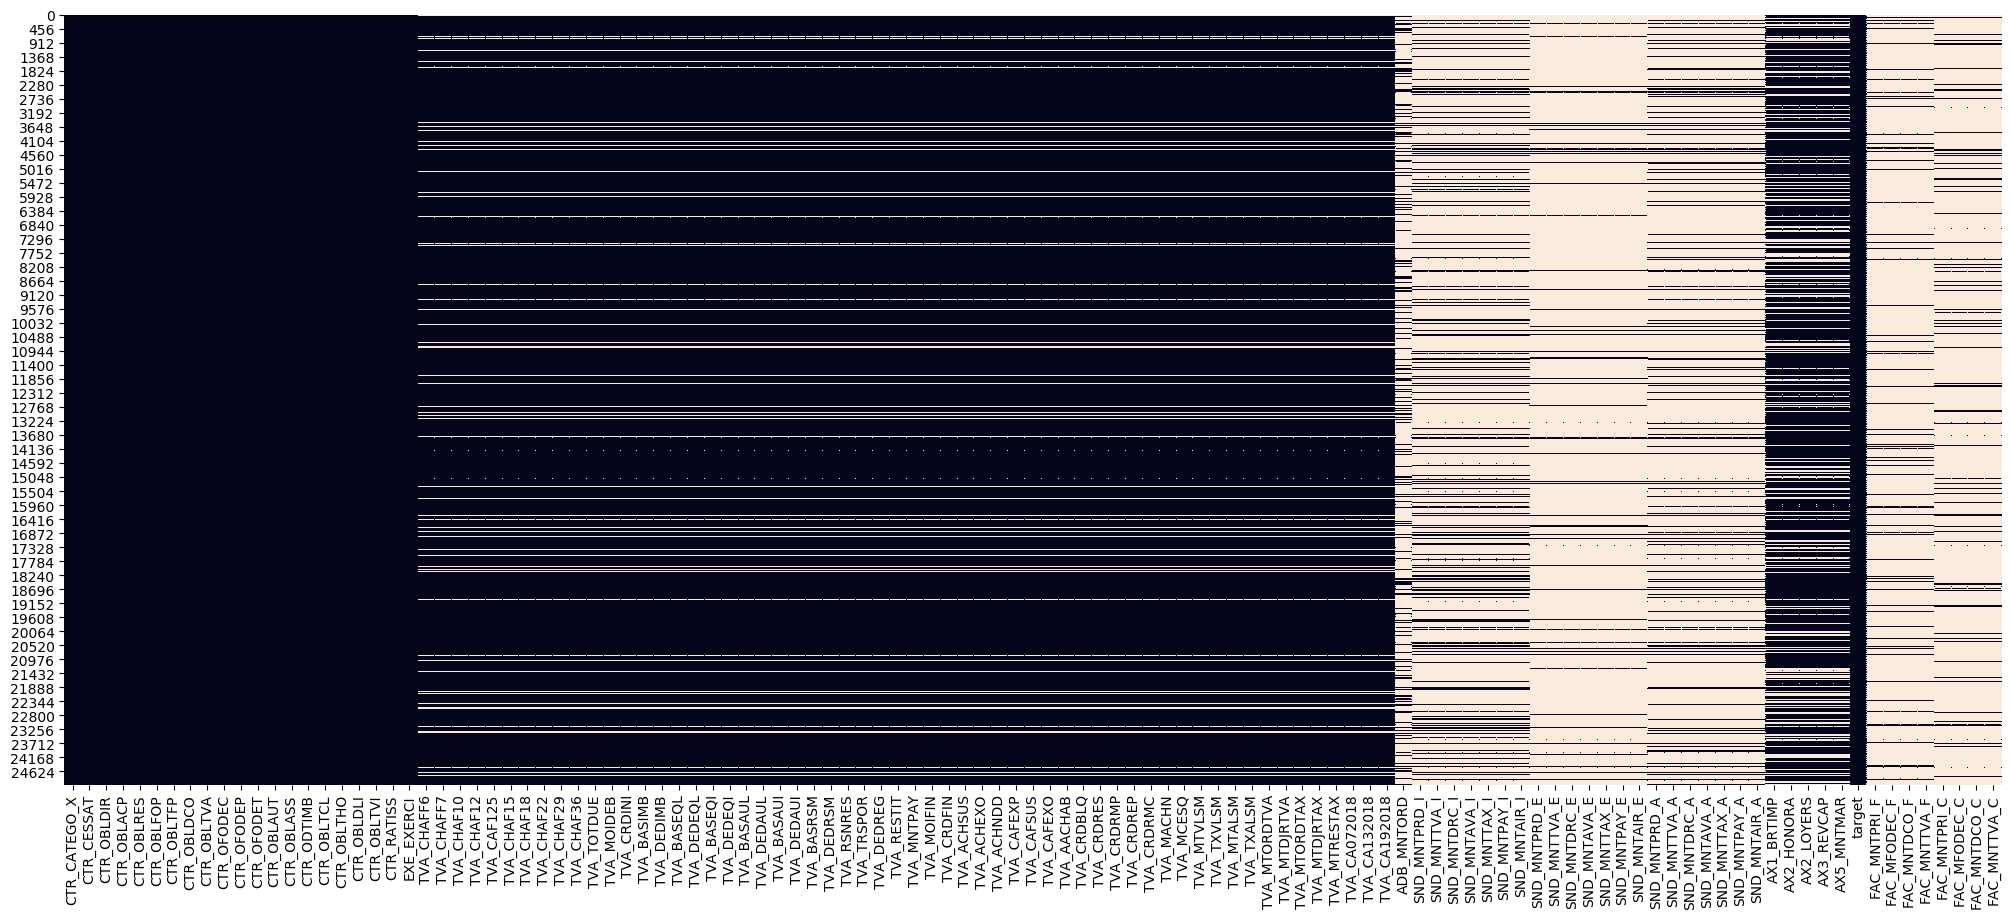

On a constaté que la plupart des colonnes sont bien remplies.
- Les colonnes les mieux remplies fournissent 75% volume de données
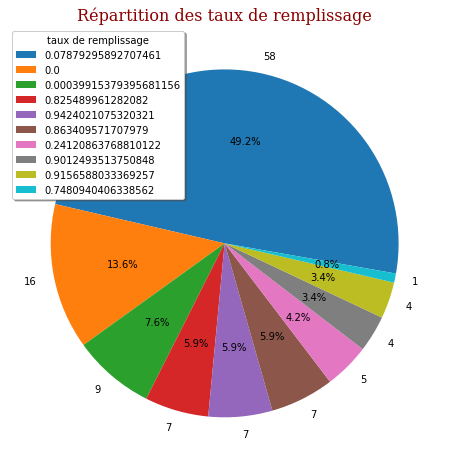

### <a id='2-2'><center><font color="steelblue">2-2) Analyse du fond</font></center></a>

#### <a id='2-2-1'><center><font color="green">2-2-1) Visualisation de la target</font></center></a>

La target présente **2 parties** distinctes.
- Une partie de valeurs à **0** qui représente un tiers des valeurs.
- Une partie des valeurs répartis selon une distribution normale.
- - **Centrée** sur une valeur de **15**
- - **Amplitude** d'environ **+/-5**

**Signification de la variable :**
Par déductions et intuition on peut dégager une hypothèse.
- Les **0** représentent les personnes morales qui ne doivent rien au FISC -> **Groupe 0 = Non-fraudeurs**
- Les **"fraudeurs"** sont désignés par la target selon un pourcentage ou une valeur ou encore un score qui désignerait la quantité de valeurs qu'ils auraient dû payer aux impôts. Ma thèse la plus crédible serait un pourcentage. (Entre **5 et 25% d'impayé**). -> **Groupe 1 = Fraudeurs**

Remarquons que si on retient cette hypothèse, on suggère qu'il y a **3 fois plus de fraudeurs** que de non fraudeurs ce qui est déstabilisant. <br>
Répartition de la target : (selon hypothèse)
- 75% Fraudeurs 
- 25% Non fraudeurs

Une étude métier pourrait éclaircir ce point.<br><br>
*Peut-être qu'il est très difficile de comprendre le système fiscal et que les fraudeurs sont constitués de fraudeurs de bonne foi et d'autres font exprès de frauder.* <br>
*Retenons cette idée pour une éventuelle extension de l'étude sur les fraudeurs* <br>
<center><b>hypothèse de la constitution des fraudeurs :</b></center>
<center>- <b>fraudeurs de bonne foi</b></center>
<center>- <b>fraudeurs intentionnels</b></center>

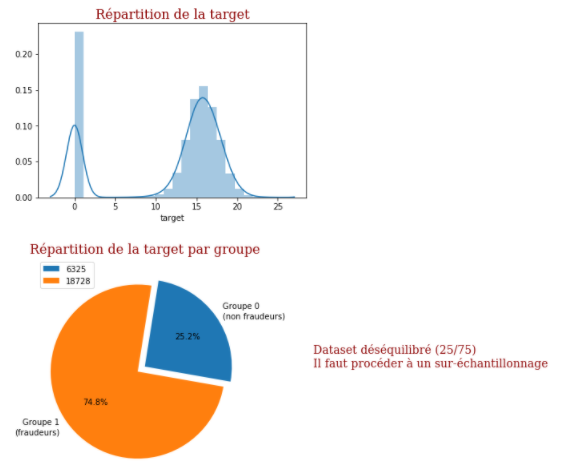

#### <a id='2-2-2'><center><font color="green">2-2-2) Compréhension des variables</font></center></a>

- 12 features n'ont pas de descriptions.
- la feature FACAGR n'existe pas dans le dataset initial bien qu'elle soit renseignée dans la description

## <font color='red'>Etude des NaNs

### Réalisation d'un tableau de nan présentant :
- Le code de chaque colonne
- sa description depuis le tableau de description
- le taux de nan par colonnes
- le nombre de valeurs renseignées
- le nombre de valeurs manquantes

- [Création de groupes de features discriminés en fonction du taux de nan et regex](#recueil)

En produisant ce tableau et en groupant les données par taux de remplissage on constate que le tableau de description des variables présente des doublons.

On peut constater qu'on peut regrouper les features par leur taux de remplissage.
- **Celles d'un même groupe sont souvent de la même famille.**

# -  <a id='recueil'>[Passer](#recueilbas)<br><font color="red">Receuil des colonnes dans l'ordre du taux de nan</font></a>
Tout ce travail sur les nans nous a permis de constituer 10 groupes de données qui ont les mêmes caractéristiques et sont décrites comme étant de la même famille. 
- Nous pourrons donc entrainer nos modèles sur des groupes de données que nous auront très bien identifié. Voici ces 10 groupes et les élements qui les compose.
<br><br>
 - <font color='#088A4B'>**columns_codes** : codes et année d'exercices (0 nans)</font>
 - <font color='#088A4B'>**columns_obligations_0** : Obligations (0 nans)</font>
 - <font color='#088A4B'>**columns_obligations** : Obligations</font>
 - <font color='#088A4B'>**columns_TVA** : Toutes les TVA</font>
 - <font color='#088A4B'>**columns_revenus** : Les différents revenus</font>
 - <font color='#088A4B'>**columns_ordonnance** : </font>
 - <font color='#088A4B'>**columns_autres_regimes** :</font>
 - <font color='#088A4B'>**columns_facture_suspension** : Les factures en suspension</font>
 - <font color='#088A4B'>**column_facture_F** : Les factures de type F, F est une données inconnue</font>
 - <font color='#088A4B'>**columns_exportation** :</font>
 <br><br>
 - <font color='#088A4B'>columns_codes : codes et année d'exercices (0 nans)</font>
    - <font color='#8904B1'>1        BCT_CODBUR</font>
    - <font color='#8904B1'>153      CTR_MATFIS</font>
    - <font color='#8904B1'>3      CTR_CATEGO_X</font>
    - <font color='#8904B1'>5        FJU_CODFJU</font>
    - <font color='#8904B1'>6        CTR_CESSAT</font>
    - <font color='#8904B1'>7        ACT_CODACT</font>
    - <font color='#8904B1'>25       CTR_RATISS</font>
    - <font color='#8904B1'>27       EXE_EXERCI</font>
  - <font color='#088A4B'>columns_obligations_0 : Obligations (0 nans)</font>
    - <font color='#8904B1'>8     CTR_OBLDIR</font>
    - <font color='#8904B1'>9     CTR_OBLACP</font>
    - <font color='#8904B1'>10    CTR_OBLRES</font>
    - <font color='#8904B1'>11    CTR_OBLFOP</font>
    - <font color='#8904B1'>12    CTR_OBLTFP</font>
    - <font color='#8904B1'>13    CTR_OBLDCO</font>
    - <font color='#8904B1'>14    CTR_OBLTVA</font>
    - <font color='#8904B1'>21    CTR_OBLTCL</font>
  - <font color='#088A4B'>columns_obligations : Obligations</font>
    - <font color='#8904B1'>15    CTR_OFODEC</font>
    - <font color='#8904B1'>16    CTR_OFODEP</font>
    - <font color='#8904B1'>17    CTR_OFODET</font>
    - <font color='#8904B1'>18    CTR_OBLAUT</font>
    - <font color='#8904B1'>19    CTR_OBLASS</font>
    - <font color='#8904B1'>20    CTR_ODTIMB</font>
    - <font color='#8904B1'>22    CTR_OBLTHO</font>
    - <font color='#8904B1'>23    CTR_OBLDLI</font>
    - <font color='#8904B1'>24    CTR_OBLTVI</font>
  - <font color='#088A4B'>columns_TVA : Toutes les TVA</font>
    - <font color='#8904B1'>28      TVA_CHAFF6</font>
    - <font color='#8904B1'>29      TVA_CHAFF7</font>
    - <font color='#8904B1'>30      TVA_CHAF10</font>
    - <font color='#8904B1'>31      TVA_CHAF12</font>
    - <font color='#8904B1'>32      TVA_CAF125</font>
    - <font color='#8904B1'>33      TVA_CHAF15</font>
    - <font color='#8904B1'>34      TVA_CHAF18</font>
    - <font color='#8904B1'>35      TVA_CHAF22</font>
    - <font color='#8904B1'>36      TVA_CHAF29</font>
    - <font color='#8904B1'>37      TVA_CHAF36</font>
    - <font color='#8904B1'>38      TVA_TOTDUE</font>
    - <font color='#8904B1'>39      TVA_MOIDEB</font>
    - <font color='#8904B1'>40      TVA_CRDINI</font>
    - <font color='#8904B1'>41      TVA_BASIMB</font>
    - <font color='#8904B1'>42      TVA_DEDIMB</font>
    - <font color='#8904B1'>43      TVA_BASEQL</font>
    - <font color='#8904B1'>44      TVA_DEDEQL</font>
    - <font color='#8904B1'>45      TVA_BASEQI</font>
    - <font color='#8904B1'>46      TVA_DEDEQI</font>
    - <font color='#8904B1'>47      TVA_BASAUL</font>
    - <font color='#8904B1'>48      TVA_DEDAUL</font>
    - <font color='#8904B1'>49      TVA_BASAUI</font>
    - <font color='#8904B1'>50      TVA_DEDAUI</font>
    - <font color='#8904B1'>51      TVA_BASRSM</font>
    - <font color='#8904B1'>52      TVA_DEDRSM</font>
    - <font color='#8904B1'>53      TVA_RSNRES</font>
    - <font color='#8904B1'>54      TVA_TRSPOR</font>
    - <font color='#8904B1'>55      TVA_DEDREG</font>
    - <font color='#8904B1'>56      TVA_RESTIT</font>
    - <font color='#8904B1'>57      TVA_MNTPAY</font>
    - <font color='#8904B1'>58      TVA_MOIFIN</font>
    - <font color='#8904B1'>59      TVA_CRDFIN</font>
    - <font color='#8904B1'>60      TVA_ACHSUS</font>
    - <font color='#8904B1'>61      TVA_ACHEXO</font>
    - <font color='#8904B1'>62      TVA_ACHNDD</font>
    - <font color='#8904B1'>63      TVA_CAFEXP</font>
    - <font color='#8904B1'>64      TVA_CAFSUS</font>
    - <font color='#8904B1'>65      TVA_CAFEXO</font>
    - <font color='#8904B1'>66      TVA_AACHAB</font>
    - <font color='#8904B1'>67      TVA_CRDBLQ</font>
    - <font color='#8904B1'>68      TVA_CRDRES</font>
    - <font color='#8904B1'>69      TVA_CRDRMP</font>
    - <font color='#8904B1'>70      TVA_CRDREP</font>
    - <font color='#8904B1'>71      TVA_CRDRMC</font>
    - <font color='#8904B1'>72       TVA_MACHN</font>
    - <font color='#8904B1'>73       TVA_MCESQ</font>
    - <font color='#8904B1'>74      TVA_MTVLSM</font>
    - <font color='#8904B1'>75      TVA_TXVLSM</font>
    - <font color='#8904B1'>76      TVA_MTALSM</font>
    - <font color='#8904B1'>77      TVA_TXALSM</font>
    - <font color='#8904B1'>78    TVA_MTORDTVA</font>
    - <font color='#8904B1'>79    TVA_MTDJRTVA</font>
    - <font color='#8904B1'>80    TVA_MTORDTAX</font>
    - <font color='#8904B1'>81    TVA_MTDJRTAX</font>
    - <font color='#8904B1'>82    TVA_MTRESTAX</font>
    - <font color='#8904B1'>83    TVA_CA072018</font>
    - <font color='#8904B1'>84    TVA_CA132018</font>
    - <font color='#8904B1'>85    TVA_CA192018</font>
  - <font color='#088A4B'>columns_revenus : Les différents revenus</font>
    - <font color='#8904B1'>109    AX1_BRTIMP</font>
    - <font color='#8904B1'>110    AX2_HONORA</font>
    - <font color='#8904B1'>111    AX2_LOYERS</font>
    - <font color='#8904B1'>112    AX3_REVCAP</font>
    - <font color='#8904B1'>113    AX5_MNTMAR</font>
  - <font color='#088A4B'>columns_ordonnance : </font>
    - <font color='#8904B1'>87    ADB_MNTORD</font>
  - <font color='#088A4B'>columns_importation :</font>
    - <font color='#8904B1'>88    SND_MNTPRD_I</font>
    - <font color='#8904B1'>89    SND_MNTTVA_I</font>
    - <font color='#8904B1'>90    SND_MNTDRC_I</font>
    - <font color='#8904B1'>91    SND_MNTAVA_I</font>
    - <font color='#8904B1'>92    SND_MNTTAX_I</font>
    - <font color='#8904B1'>93    SND_MNTPAY_I</font>
    - <font color='#8904B1'>94    SND_MNTAIR_I</font>
  - <font color='#088A4B'>columns_autres_regimes :</font>
    - <font color='#8904B1'>102    SND_MNTPRD_A</font>
    - <font color='#8904B1'>103    SND_MNTTVA_A</font>
    - <font color='#8904B1'>104    SND_MNTDRC_A</font>
    - <font color='#8904B1'>105    SND_MNTAVA_A</font>
    - <font color='#8904B1'>106    SND_MNTTAX_A</font>
    - <font color='#8904B1'>107    SND_MNTPAY_A</font>
    - <font color='#8904B1'>108    SND_MNTAIR_A</font>
  - <font color='#088A4B'>columns_facture_suspension : Les factures en suspension</font>
    - <font color='#8904B1'>146    FAC_MNTPRI_C</font>
    - <font color='#8904B1'>147    FAC_MFODEC_C</font>
    - <font color='#8904B1'>148    FAC_MNTDCO_C</font>
    - <font color='#8904B1'>125    FAC_MNTTVA_C</font>
  - <font color='#088A4B'>column_facture_F : Les factures de type F, F est une données inconnue</font>
    - <font color='#8904B1'>142    FAC_MNTPRI_F</font>
    - <font color='#8904B1'>143    FAC_MFODEC_F</font>
    - <font color='#8904B1'>144    FAC_MNTDCO_F</font>
    - <font color='#8904B1'>145    FAC_MNTTVA_F</font>
  - <font color='#088A4B'>columns_exportation :</font>
    - <font color='#8904B1'>95     SND_MNTPRD_E</font>
    - <font color='#8904B1'>96     SND_MNTTVA_E</font>
    - <font color='#8904B1'>97     SND_MNTDRC_E</font>
    - <font color='#8904B1'>98     SND_MNTAVA_E</font>
    - <font color='#8904B1'>99     SND_MNTTAX_E</font>
    - <font color='#8904B1'>100    SND_MNTPAY_E</font>
    - <font color='#8904B1'>101    SND_MNTAIR_E</font>
    <a id='recueilbas'>
</a>

Etudes particulière du groupe TVA

#### <a id='2-2-3'><center><font color="green">2-2-3) Corrélations features - target</font></center></a>

#### <a id='2-2-4'><center><font color="green">2-2-4) Valeurs aberrantes</font></center></a>

#### <a id='2-2-5'><center><font color="green">2-2-5) Valeurs atypiques</font></center></a>

## <a id='3'><center><font color="INDIANRED">3) Visualiser les données</font></center></a>

## <a id='4'><center><font color="INDIANRED">4) Nettoyer les données</font></center></a>

## <a id='5'><center><font color="INDIANRED">5) Equilibrer les données</font></center></a>

## <a id='6'><center><font color="INDIANRED">6) Identifier la problématique (classification)</font></center></a>

## <a id='7'><center><font color="INDIANRED">7) Appliquer des modèles</font></center></a>

## <a id='8'><center><font color="INDIANRED">8) Trouver le modèle plus pertinent</font></center></a>

## Variables importantes et peu présentés:
- SND_MNTPRD_E :  	Montant Produit Exporté
- FAC_MFODEC_F : 	Montant taxe FODEC sur factures émises en susp.

### <a id='8-1'><center><font color="steelblue">8-1) Train_test_split</font></center></a>

### <a id='8-2'><center><font color="steelblue">8-2) Validation Set</font></center></a>

### <a id='8-3'><center><font color="steelblue">8-3) Cross Validation</font></center></a>

### <a id='8-4'><center><font color="steelblue">8-4) Validation Curve</font></center></a>

### <a id='8-5'><center><font color="steelblue">8-5) GridSearchCV</font></center></a>

### <a id='8-6'><center><font color="steelblue">8-6) Learning Curve</font></center></a>

## <a id='9'><center><font color="INDIANRED">9) Analyser le résultat</font></center></a>